In [1]:
import pandas as pd

In [2]:
#read data

In [3]:
df_reg=pd.read_csv("regional_data.csv")
df_prov=pd.read_csv("province_data.csv")

In [4]:
df_reg.head()

,Date,Region_Code,Region_Name,Region_Latitude,Region_Longitude,Hospitalized_with_Symptoms,Intensive_Care,Total_Hospitalized,Tot_Home_Isolation,Total_Actually_Positive,New_Actually_Positive,Healed,Deceased,Total_Cases,Total_Medical_Swabs
0,2020-02-24 18:00:00,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,4,Trentino-Alto Adige,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [5]:
df_prov.head()

,Date,Region_Code,Region_Name,Province_Code,Province_Name,Province_GeoCode,Province_Latitude,Prov_Longitude,Total_Cases
0,2020-02-24 18:00:00,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,2020-02-24 18:00:00,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-24 18:00:00,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,2020-02-24 18:00:00,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
4,2020-02-24 18:00:00,17,Basilicata,77,Matera,MT,40.667512,16.597924,0


In [6]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 15 columns):
Date                          1260 non-null object
Region_Code                   1260 non-null int64
Region_Name                   1260 non-null object
Region_Latitude               1260 non-null float64
Region_Longitude              1260 non-null float64
Hospitalized_with_Symptoms    1260 non-null int64
Intensive_Care                1260 non-null int64
Total_Hospitalized            1260 non-null int64
Tot_Home_Isolation            1260 non-null int64
Total_Actually_Positive       1260 non-null int64
New_Actually_Positive         1260 non-null int64
Healed                        1260 non-null int64
Deceased                      1260 non-null int64
Total_Cases                   1260 non-null int64
Total_Medical_Swabs           1260 non-null int64
dtypes: float64(2), int64(11), object(2)
memory usage: 147.7+ KB


In [7]:
df_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 9 columns):
Date                 6420 non-null object
Region_Code          6420 non-null int64
Region_Name          6420 non-null object
Province_Code        6420 non-null int64
Province_Name        6420 non-null object
Province_GeoCode     6360 non-null object
Province_Latitude    6420 non-null float64
Prov_Longitude       6420 non-null float64
Total_Cases          6420 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 451.5+ KB


handling nulls

In [8]:
df_prov[df_prov.isnull().any(axis=1)].head()

,Date,Region_Code,Region_Name,Province_Code,Province_Name,Province_GeoCode,Province_Latitude,Prov_Longitude,Total_Cases
15,2020-02-24 18:00:00,15,Campania,63,Napoli,NaN,40.839566,14.25085,0
122,2020-02-25 18:00:00,15,Campania,63,Napoli,NaN,40.839566,14.25085,0
229,2020-02-26 18:00:00,15,Campania,63,Napoli,NaN,40.839566,14.25085,0
336,2020-02-27 18:00:00,15,Campania,63,Napoli,NaN,40.839566,14.25085,3
443,2020-02-28 18:00:00,15,Campania,63,Napoli,NaN,40.839566,14.25085,4


In [9]:
df_prov.loc[df_prov.Province_Name=='Napoli','Province_GeoCode']='NA'

In [10]:
df_prov['Date']=pd.to_datetime(df_prov['Date'])
df_reg['Date']=pd.to_datetime(df_reg['Date'])

In [11]:
df_reg.nunique()

Date                            60
Region_Code                     20
Region_Name                     20
Region_Latitude                 21
Region_Longitude                21
Hospitalized_with_Symptoms     642
Intensive_Care                 329
Total_Hospitalized             676
Tot_Home_Isolation             814
Total_Actually_Positive        886
New_Actually_Positive          373
Healed                         521
Deceased                       468
Total_Cases                    921
Total_Medical_Swabs           1096
dtype: int64

handling duplicate region

In [12]:
dftest = df_reg[['Region_Name']]+df_reg[['Region_Latitude']].astype('str')

In [13]:
dftest=df_reg[['Region_Name']].copy()
dftest['Region_Name']=dftest['Region_Name']+df_reg['Region_Latitude'].astype('str')

In [14]:
dftest['Region_Name'].unique()

array(['Abruzzo42.35122196', 'Basilicata40.63947052',
       'Trentino-Alto Adige46.49933453', 'Calabria38.90597598',
       'Campania40.83956555', 'Emilia-Romagna44.49436681',
       'Friuli-Venezia Giulia45.6494354', 'Lazio41.89277044',
       'Liguria44.41149315', 'Lombardia45.46679409', 'Marche43.61675973',
       'Molise41.55774754', 'Piemonte45.0732745', 'Puglia41.12559576',
       'Sardegna39.21531192', 'Sicilia38.11569725', 'Toscana43.76923077',
       'Trentino-Alto Adige46.06893511', 'Umbria43.10675841',
       "Valle d'Aosta45.73750286", 'Veneto45.43490485'], dtype=object)

In [15]:
df_reg.loc[df_reg['Region_Name']=='Trentino-Alto Adige'].groupby(['Region_Latitude']).count()

,Date,Region_Code,Region_Name,Region_Longitude,Hospitalized_with_Symptoms,Intensive_Care,Total_Hospitalized,Tot_Home_Isolation,Total_Actually_Positive,New_Actually_Positive,Healed,Deceased,Total_Cases,Total_Medical_Swabs
Region_Latitude,,,,,,,,,,,,,,
46.068935,60,60,60,60,60,60,60,60,60,60,60,60,60,60
46.499335,60,60,60,60,60,60,60,60,60,60,60,60,60,60


In [16]:
indeks=['Date','Hospitalized_with_Symptoms', 'Intensive_Care',
       'Total_Hospitalized', 'Tot_Home_Isolation', 'Total_Actually_Positive',
       'New_Actually_Positive', 'Healed', 'Deceased', 'Total_Cases',
       'Total_Medical_Swabs']

indeks2=['Hospitalized_with_Symptoms', 'Intensive_Care',
       'Total_Hospitalized', 'Tot_Home_Isolation', 'Total_Actually_Positive',
       'New_Actually_Positive', 'Healed', 'Deceased', 'Total_Cases',
       'Total_Medical_Swabs']

dftest=df_reg.loc[df_reg['Region_Name']=='Trentino-Alto Adige',indeks].groupby(['Date']).sum()
dftest.set_index(df_reg.loc[(df_reg['Region_Latitude']<46.1)&(df_reg['Region_Name']=='Trentino-Alto Adige')].index, inplace=True)

for i in indeks2:
    df_reg.loc[(df_reg['Region_Latitude']<46.1)&(df_reg['Region_Name']=='Trentino-Alto Adige'),i]=dftest[i]


In [17]:
df_reg.drop(df_reg.loc[(df_reg['Region_Latitude']>46.4)&(df_reg['Region_Name']=='Trentino-Alto Adige')].index,inplace=True)

In [18]:
df_reg.loc[df_reg['Region_Name']=='Trentino-Alto Adige','Region_Latitude']=46.4337
df_reg.loc[df_reg['Region_Name']=='Trentino-Alto Adige','Region_Longitude']=11.1693


In [19]:
df_prov['Province_Name'].unique()

array(['Chieti', "L'Aquila", 'Pescara', 'Teramo', 'Matera', 'Potenza',
       'Bolzano', 'Catanzaro', 'Cosenza', 'Crotone', 'Reggio di Calabria',
       'Vibo Valentia', 'Avellino', 'Benevento', 'Caserta', 'Napoli',
       'Salerno', 'Bologna', 'Ferrara', 'Forlì-Cesena', 'Modena', 'Parma',
       'Piacenza', 'Ravenna', "Reggio nell'Emilia", 'Rimini', 'Gorizia',
       'Pordenone', 'Trieste', 'Udine', 'Frosinone', 'Latina', 'Rieti',
       'Roma', 'Viterbo', 'Genova', 'Imperia', 'La Spezia', 'Savona',
       'Bergamo', 'Brescia', 'Como', 'Cremona', 'Lecco', 'Lodi',
       'Mantova', 'Milano', 'Monza e della Brianza', 'Pavia', 'Sondrio',
       'Varese', 'Ancona', 'Ascoli Piceno', 'Fermo', 'Macerata',
       'Pesaro e Urbino', 'Campobasso', 'Isernia', 'Alessandria', 'Asti',
       'Biella', 'Cuneo', 'Novara', 'Torino', 'Verbano-Cusio-Ossola',
       'Vercelli', 'Bari', 'Barletta-Andria-Trani', 'Brindisi', 'Foggia',
       'Lecce', 'Taranto', 'Cagliari', 'Nuoro', 'Oristano', 'Sassari',
  

Computer performance

In [20]:
# import cProfile

In [21]:
# def slow_function():
#     total = 0.0
    
#     for i, _ in enumerate(range(10000)):
        
#         for j, _ in enumerate(range(1, 10000)):
#             total += (i * j)

#     return total

In [22]:
# cProfile.run('slow_function()', sort='time')

In [23]:
# %%timeit

# slow_function()

In [24]:
# import platform

In [25]:
# print(platform.machine())
# print(platform.version())
# print(platform.platform())
# print(platform.uname())
# print(platform.system())
# print(platform.processor())

In [26]:
# !pip install py-cpuinfo

In [27]:
# import cpuinfo

# from cpuinfo import get_cpu_info

# for key, value in get_cpu_info().items():
#     print("{0}: {1}".format(key, value))

In [28]:
!pip install wget

!pip install geopandas

!pip install descartes

  Running setup.py bdist_wheel for wget ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 931kB 16.7MB/s ta 0:00:01
    100% |████████████████████████████████| 14.7MB 3.5MB/s eta 0:00:01
    100% |████████████████████████████████| 1.8MB 25.0MB/s ta 0:00:01
    100% |████████████████████████████████| 10.9MB 5.1MB/s eta 0:00:01
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
#download maps

In [30]:
import wget

wget.download('http://biogeo.ucdavis.edu/data/diva/adm/ITA_adm.zip')

'ITA_adm (1).zip'

In [31]:
import pathlib
pathlib.Path().absolute()

PosixPath('/home/ec2-user/SageMaker/COVID-19-Italia')

In [32]:
import zipfile

with zipfile.ZipFile('ITA_adm.zip','r') as zip_ref:
    zip_ref.extractall(r'/home/ec2-user/SageMaker/COVID-19-Italia/ITA_adm')

In [33]:
import geopandas as gpd

fp = 'ITA_adm/ITA_adm2.shp'
map_df = gpd.read_file(fp)

map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,112,ITA,Italy,1,Abruzzo,1,Chieti,Provincia,Province,None,None,"POLYGON ((14.25403 42.44514, 14.25403 42.44486..."
1,112,ITA,Italy,1,Abruzzo,2,L'Aquila,Provincia,Province,None,Aquila,"POLYGON ((13.40441 42.57731, 13.40542 42.57468..."
2,112,ITA,Italy,1,Abruzzo,3,Pescara,Provincia,Province,None,None,"POLYGON ((14.07483 42.54282, 14.07576 42.54278..."
3,112,ITA,Italy,1,Abruzzo,4,Teramo,Provincia,Province,None,None,"POLYGON ((13.91542 42.89561, 13.91542 42.89542..."
4,112,ITA,Italy,2,Apulia,5,Bari,Provincia,Province,None,None,"MULTIPOLYGON (((17.28370 40.77928, 17.28340 40..."


In [34]:
for i in map_df.NAME_2.unique():
    if not i in df_prov['Province_Name'].unique():
        print(i+'  gada\n')
    map_df.NAME_2.unique()

Reggio Di Calabria  gada

Forli' - Cesena  gada

Reggio Nell'Emilia  gada

Mantua  gada

Monza and Brianza  gada

Pesaro E Urbino  gada

Carbonia-Iglesias  gada

Medio Campidano  gada

Ogliastra  gada

Olbia-Tempio  gada

Syracuse  gada

Florence  gada

Padua  gada



In [35]:
prov1=[
    'Reggio Di Calabria',
    "Forli' - Cesena",
    "Reggio Nell'Emilia",
    'Mantua',
    'Monza and Brianza',
    'Pesaro E Urbino',
    'Carbonia-Iglesias',
    'Medio Campidano',
    'Ogliastra',
    'Olbia-Tempio',
    'Syracuse',
    'Florence',
    'Padua' 
]

prov2=[
    'Reggio di Calabria',
    'Forlì-Cesena',
    "Reggio nell'Emilia",
    'Mantova',
    'Monza e della Brianza',
    'Pesaro e Urbino',
    'Sud Sardegna',
    'Sud Sardegna',
    'Nuoro',
    'Sassari',
    'Siracusa',
    'Firenze',
    'Padova'
]

j=0
for i in prov1:
    map_df.loc[map_df['NAME_2']==i,'NAME_2']=prov2[j]
    j=j+1
    



In [36]:
df_prov.loc[df_prov['Date']=='2020-04-23 17:00:00','Total_Cases'].max()

17277

In [37]:
#visualizing spread

In [38]:
import matplotlib.pyplot as plt

data_for_map=df_prov.loc[df_prov['Date']=='2020-04-23 17:00:00'].copy()

merged = map_df.join(data_for_map.set_index('Province_Name'), on='NAME_2')
merged.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'Total_Cases'
# set the range for the choropleth
vmin, vmax = 0, 17000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

merged=merged.append({'Total_Cases' : 17000 } , ignore_index=True)



#get province with highest total cases

plt.text(merged.loc[44,'Prov_Longitude'],47.2,merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')
plt.text(6,47.5,"2020-04-23",size=15)


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

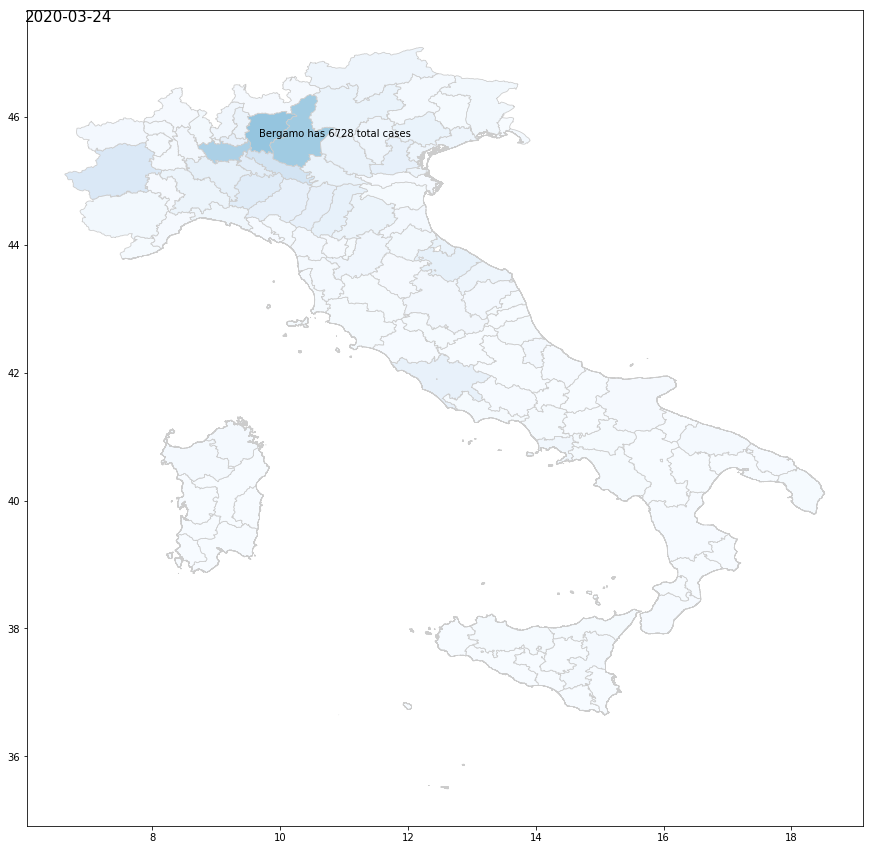

In [39]:
import matplotlib.pyplot as plt

data_for_map=df_prov.loc[df_prov['Date']=='2020-03-24 17:00:00'].copy()

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map.set_index('Province_Name'), on='NAME_2')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'Total_Cases'
# set the range for the choropleth
vmin, vmax = 0, 8000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

merged=merged.append({'Total_Cases' : 17000 } , ignore_index=True)



#get province with highest total cases
plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')
plt.text(6,47.5,"2020-03-24",size=15)


# # Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

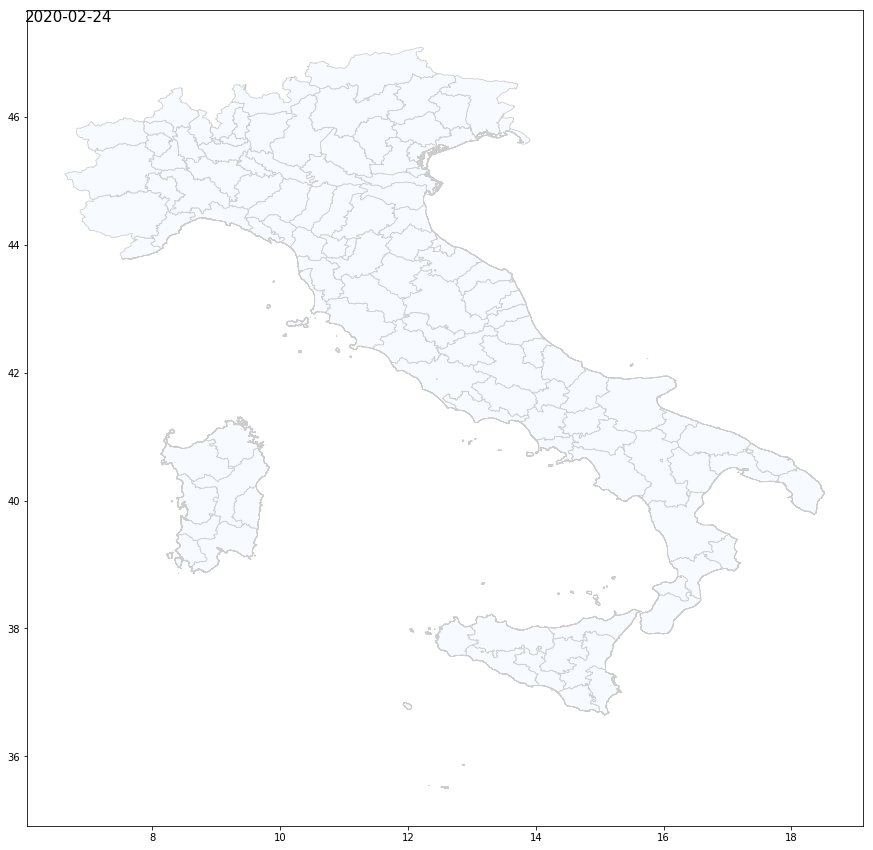

In [40]:
import matplotlib.pyplot as plt

data_for_map=df_prov.loc[df_prov['Date']=='2020-02-24 18:00:00'].copy()

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map.set_index('Province_Name'), on='NAME_2')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'Total_Cases'
# set the range for the choropleth
vmin, vmax = 0, 8000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

merged=merged.append({'Total_Cases' : 17000 } , ignore_index=True)



#get province with highest total cases
plt.text(6,47.5,"2020-02-24",size=15)


# Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [41]:
import numpy as np
import seaborn as sns

In [42]:
col = df_reg.Region_Name.unique()
for i in col:
    df_reg.loc[df_reg['Region_Name'] == i, 'New_Deceased'] = np.array((0, *np.diff(df_reg.loc[df_reg['Region_Name'] == i, 'Deceased'])))
    df_reg.loc[df_reg['Region_Name'] == i, 'New_Healed'] = np.array((0, *np.diff(df_reg.loc[df_reg['Region_Name'] == i, 'Healed'])))
    df_reg.loc[df_reg['Region_Name'] == i, 'New_Medical_Swabs'] = np.array((0, *np.diff(df_reg.loc[df_reg['Region_Name'] == i, 'Total_Medical_Swabs'])))

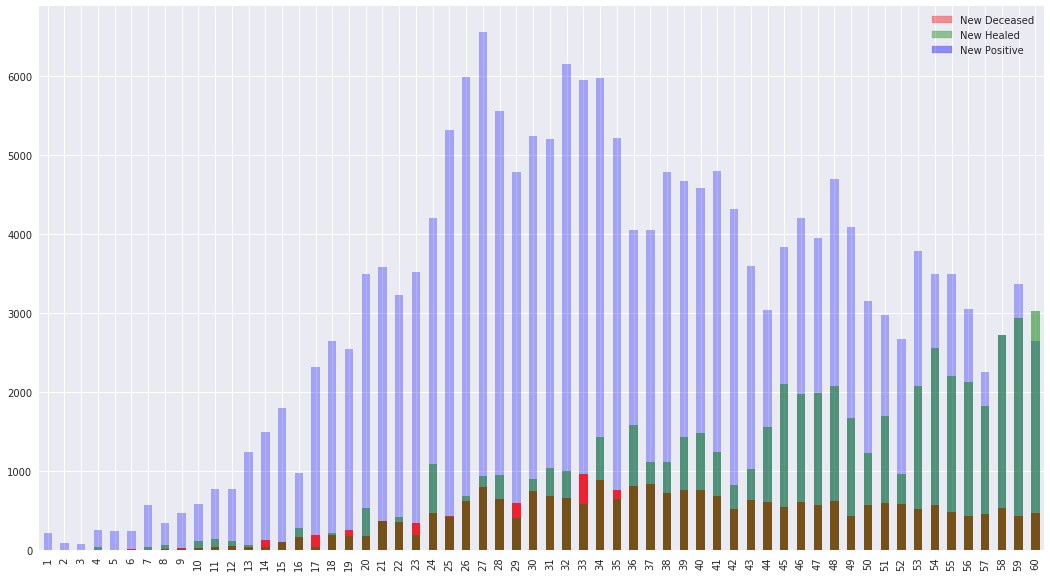

In [43]:

# plot positives

# for a pandas DataFrame

import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot

sns.set()


tempData    = {"Total Positive":np.array(df_reg.groupby('Date')['Total_Actually_Positive'].sum()),

               "Total Deceased":np.array(df_reg.groupby('Date')['Deceased'].sum()),
               
               "Deceased":np.array(df_reg.groupby('Date')['New_Deceased'].sum()),
              
               "Healed":np.array(df_reg.groupby('Date')['New_Healed'].sum())};


# Seasons              
seasons     = range(1,61)

# Create a DataFrame instance

dataFrame   = pd.DataFrame(tempData, index=seasons)

m1_t = pd.DataFrame({

 'normal' : np.array(df_reg.groupby('Date')['New_Actually_Positive'].sum())

},index=seasons)



#Draw an area plot for the DataFrame data
m1_t.plot(figsize=(18,10),kind='bar', stacked=False,alpha=0.3,color='blue')
# df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
dataFrame['Deceased'].plot(kind='bar', stacked=False,alpha=0.8,color='red')
dataFrame['Healed'].plot(kind='bar', stacked=False,alpha=0.5,color='Green')


red_patch = mpatches.Patch(color='red',alpha=0.4, label='New Deceased')
green_patch = mpatches.Patch(color='green',alpha=0.4, label='New Healed')
blue_patch = mpatches.Patch(color='blue',alpha=0.4, label='New Positive')

plot.legend(handles=[red_patch,green_patch,blue_patch])

plot.show(block=True);

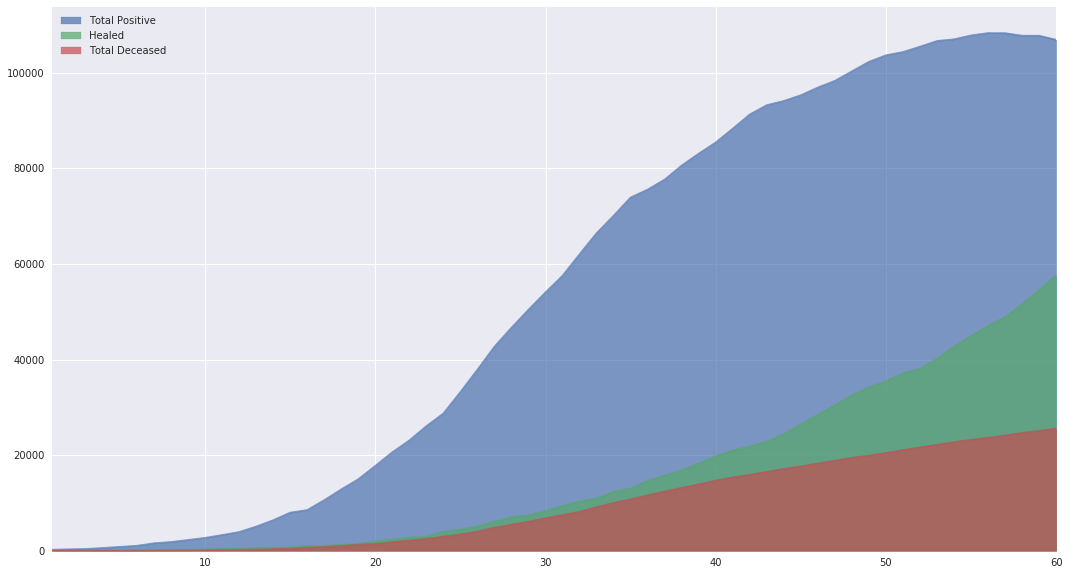

In [44]:
# Example Python program to draw an overlapped area plot

# for a pandas DataFrame

import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot

sns.set()

# pal = sns.color_palette("Set1")
# pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]

# Peak Temperature data for two cities

tempData    = {"Total Positive":np.array(df_reg.groupby('Date')['Total_Actually_Positive'].sum()),

               
               
            
              
               "Healed":np.array(df_reg.groupby('Date')['Healed'].sum()),
              "Total Deceased":np.array(df_reg.groupby('Date')['Deceased'].sum())};


# Seasons              

seasons     = range(1,61)

 

# Create a DataFrame instance

dataFrame   = pd.DataFrame(tempData, index=seasons)

m1_t = pd.DataFrame({
#  'abnormal' : [90,40,30,30],
#  'fix' : [60,70,65,70],
 'normal' : np.array(df_reg.groupby('Date')['New_Actually_Positive'].sum())
#   'bad_rate' : [20,30,40,24]
},index=seasons)

#Draw an area plot for the DataFrame data
dataFrame.plot(figsize=(18,10),kind='area', stacked=False,alpha=0.7)
# df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
# m1_t['normal'].plot(secondary_y=True,kind='bar', stacked=False,alpha=0.7,color='black')

# #Draw an area plot for the DataFrame data
# m1_t.plot(figsize=(18,10),kind='bar', stacked=False,alpha=0.2)
# # df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
# dataFrame['Deceased'].plot(kind='bar', stacked=False,alpha=1,color='red')
# dataFrame['Healed'].plot(kind='bar', stacked=False,alpha=0.4,color='Green')

# dataFrame['Total Positive'].plot(secondary_y=True,kind='area', stacked=False,alpha=0.2,color='black')
# dataFrame['Total Deceased'].plot(secondary_y=True,kind='area', stacked=False,alpha=0.2,color='red')


# red_patch = mpatches.Patch(color='red',alpha=0.2, label='The red data')
# plot.legend(handles=[red_patch])






plot.show(block=True);

In [45]:
df_population=pd.read_csv('Secondary-Data/population.csv',sep=';')
df_population.loc[(df_population['Age']!='100 years and over')&(df_population['Age']!='total'),'Age']=(df_population.loc[(df_population['Age']!='100 years and over')&(df_population['Age']!='total'),'Age'].astype(str).str[0]+df_population.loc[(df_population['Age']!='100 years and over')&(df_population['Age']!='total'),'Age'].astype(str).str[1]).astype(int)
df_population.loc[(df_population['Age']=='100 years and over'),'Age']=100
df_population.loc[(df_population['Age']=='total'),'Age']=200

In [46]:
prov1=[
    'Massa-Carrara',
    "Bolzano / Bozen",
    "Valle d'Aosta / Vallée d'Aoste"
]



prov2=[
    'Massa Carrara',
    'Bolzano',
    "Aosta"
]

j=0
for i in prov1:
    df_population.loc[df_population['Territory']==i,'Territory']=prov2[j]
    j=j+1

In [47]:
df_population.Age.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 200])

In [48]:
df_population.loc[(df_population['Age']>45)&(df_population['Age']<200),'Age'].unique()

array([ 46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100])

In [49]:
asd=df_population.loc[(df_population['Age']<10)&(df_population['Age']<20)&(df_population['SEXISTAT1']==9),['Value','Territory']].groupby('Territory').sum()

In [50]:
asd.max()

Value    5090482
dtype: int64

In [51]:
import geopandas as gpd

fp = 'ITA_adm/ITA_adm1.shp'
map_df = gpd.read_file(fp)



In [52]:
for i in map_df.NAME_1.unique():
    if not i in df_reg['Region_Name'].unique():
        print(i+'  gada\n')
        


Apulia  gada

Sicily  gada



In [53]:
prov1=[
    'Apulia',
    "Sicily"
    
]



prov2=[
    'Puglia',
    'Sicilia'
    
]

j=0
for i in prov1:
    map_df.loc[map_df['NAME_1']==i,'NAME_1']=prov2[j]
    j=j+1

In [54]:
df_reg.Region_Name.unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana',
       'Trentino-Alto Adige', 'Umbria', "Valle d'Aosta", 'Veneto'],
      dtype=object)

In [55]:
#MATEK

In [56]:
df_reg.loc[df_reg['Date']=='2020-04-23 17:00:00','Deceased'].max()

12940

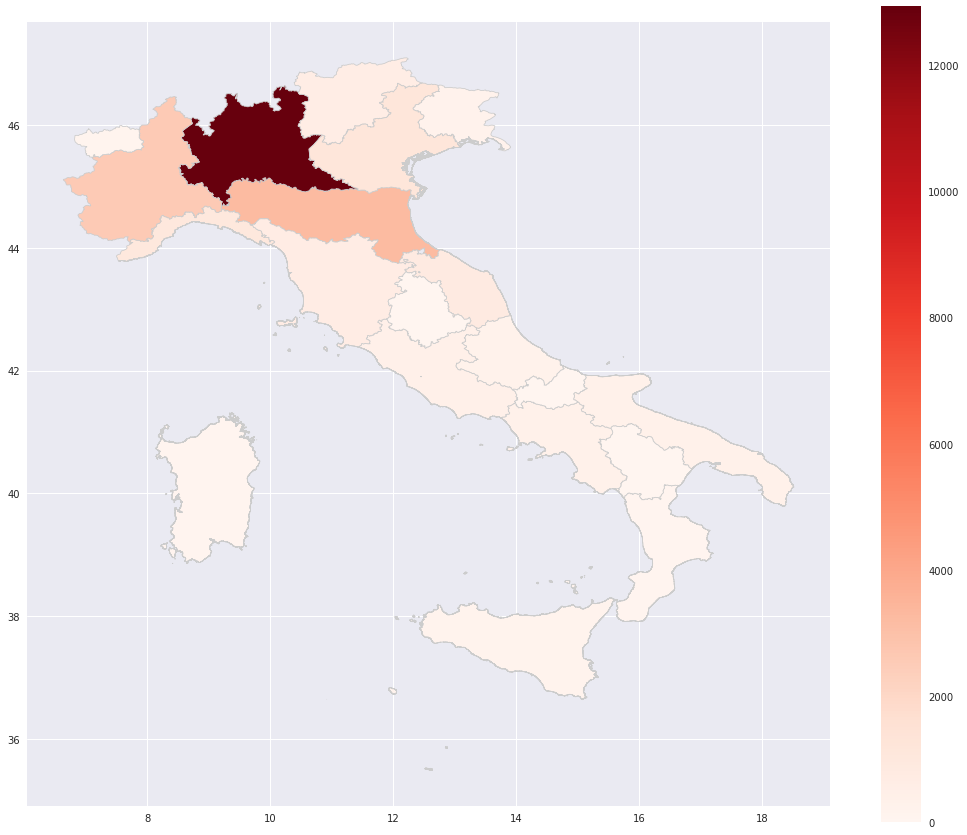

In [57]:
import matplotlib.pyplot as plt

data_for_map=df_reg.loc[df_reg['Date']=='2020-04-23 17:00:00'].copy()

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map.set_index('Region_Name'), on='NAME_1')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'Deceased'
# set the range for the choropleth
vmin, vmax = 0, merged.Deceased.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

# merged=merged.append({'Total_Cases' : 8000 } , ignore_index=True)



#get province with highest total cases
# plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

In [58]:
for i in map_df.NAME_1.unique():
    if not i in df_population.Territory.unique():
        print(i+'  gada\n')
        

Trentino-Alto Adige  gada

Valle d'Aosta  gada



In [59]:
prov1=[
    'Trentino Alto Adige / Südtirol',
    "Aosta",
    
]



prov2=[
    'Trentino-Alto Adige',
    "Valle d'Aosta",
    
]

j=0
for i in prov1:
    df_population.loc[df_population['Territory']==i,'Territory']=prov2[j]
    j=j+1

In [60]:
wds=df_population.Territory.unique()
wds.sort()
wds

array(['Abruzzo', 'Agrigento', 'Alessandria', 'Ancona', 'Arezzo',
       'Ascoli Piceno', 'Asti', 'Avellino', 'Bari',
       'Barletta-Andria-Trani', 'Basilicata', 'Belluno', 'Benevento',
       'Bergamo', 'Biella', 'Bologna', 'Bolzano', 'Brescia', 'Brindisi',
       'Cagliari', 'Calabria', 'Caltanissetta', 'Campania', 'Campobasso',
       'Caserta', 'Catania', 'Catanzaro', 'Centro (I)', 'Chieti', 'Como',
       'Cosenza', 'Cremona', 'Crotone', 'Cuneo', 'Emilia-Romagna', 'Enna',
       'Fermo', 'Ferrara', 'Firenze', 'Foggia', 'Forlì-Cesena',
       'Friuli-Venezia Giulia', 'Frosinone', 'Genova', 'Gorizia',
       'Grosseto', 'Imperia', 'Isernia', 'Isole', 'Italy', "L'Aquila",
       'La Spezia', 'Latina', 'Lazio', 'Lecce', 'Lecco', 'Liguria',
       'Livorno', 'Lodi', 'Lombardia', 'Lucca', 'Macerata', 'Mantova',
       'Marche', 'Massa Carrara', 'Matera', 'Messina', 'Milano', 'Modena',
       'Molise', 'Monza e della Brianza', 'Napoli', 'Nord-est',
       'Nord-ovest', 'Novara', 'Nuoro

In [61]:
#OLD

In [62]:
asd=df_population.loc[(df_population['Age']>44)&(df_population['Age']<200)&(df_population['SEXISTAT1']==9),['Value','Territory']].groupby('Territory').sum()

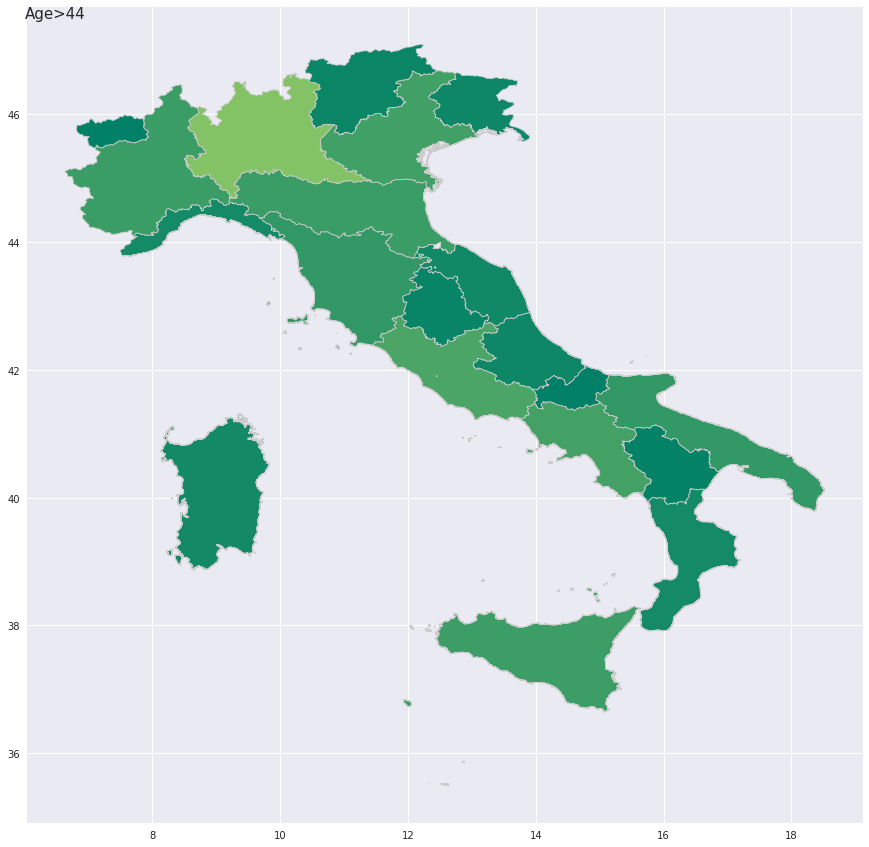

In [63]:
import matplotlib.pyplot as plt

data_for_map=asd

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map, on='NAME_1')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'Value'
# set the range for the choropleth
vmin, vmax = 0, 10060574
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

merged=merged.append({'Value' : 10060574 } , ignore_index=True)



#get province with highest total cases
# plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')
plt.text(6,47.5,"Age>44",size=15)


# # Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='summer', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='summer', linewidth=0.8, ax=ax, edgecolor='0.8')

In [64]:
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [65]:
asdtotal=df_population.loc[(df_population['Age']==200)&(df_population['SEXISTAT1']==9),['Value','Territory']].groupby('Territory').sum()

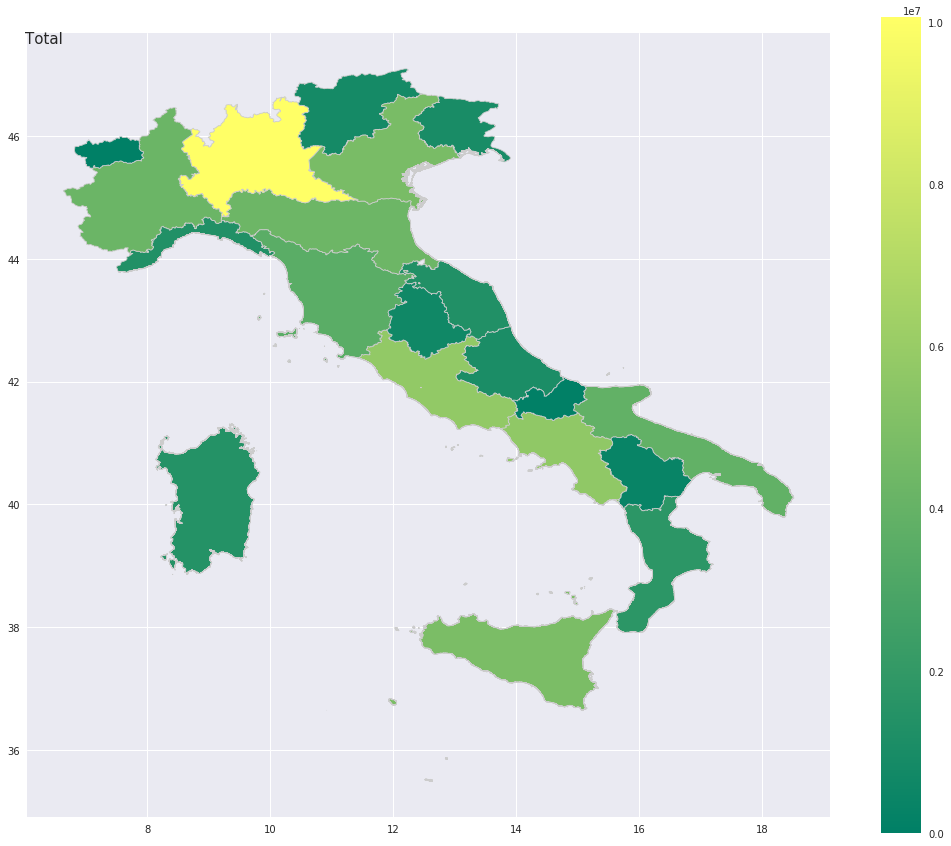

In [66]:
import matplotlib.pyplot as plt

data_for_map=asdtotal

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map, on='NAME_1')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'Value'
# set the range for the choropleth
vmin, vmax = 0, merged.Value.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

# merged=merged.append({'Total_Cases' : 8000 } , ignore_index=True)



#get province with highest total cases
# plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')
plt.text(6,47.5,"Total",size=15)


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='summer', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='summer', linewidth=0.8, ax=ax, edgecolor='0.8')

In [67]:
merged.Value.max()


10060574

In [68]:
df_hospital=pd.read_csv('Secondary-Data/Hospital.csv',sep=';')

In [69]:
df_hospital['Type of hospital'].unique()

array(['private hospital accredited to NHS', 'total', 'public hospital'],
      dtype=object)

In [70]:
prov1=[
    'Trentino Alto Adige / Südtirol',
    "Valle d'Aosta / Vallée d'Aoste",
    
]



prov2=[
    'Trentino-Alto Adige',
    "Valle d'Aosta",
    
]

j=0
for i in prov1:
    df_hospital.loc[df_hospital['Territory']==i,'Territory']=prov2[j]
    j=j+1

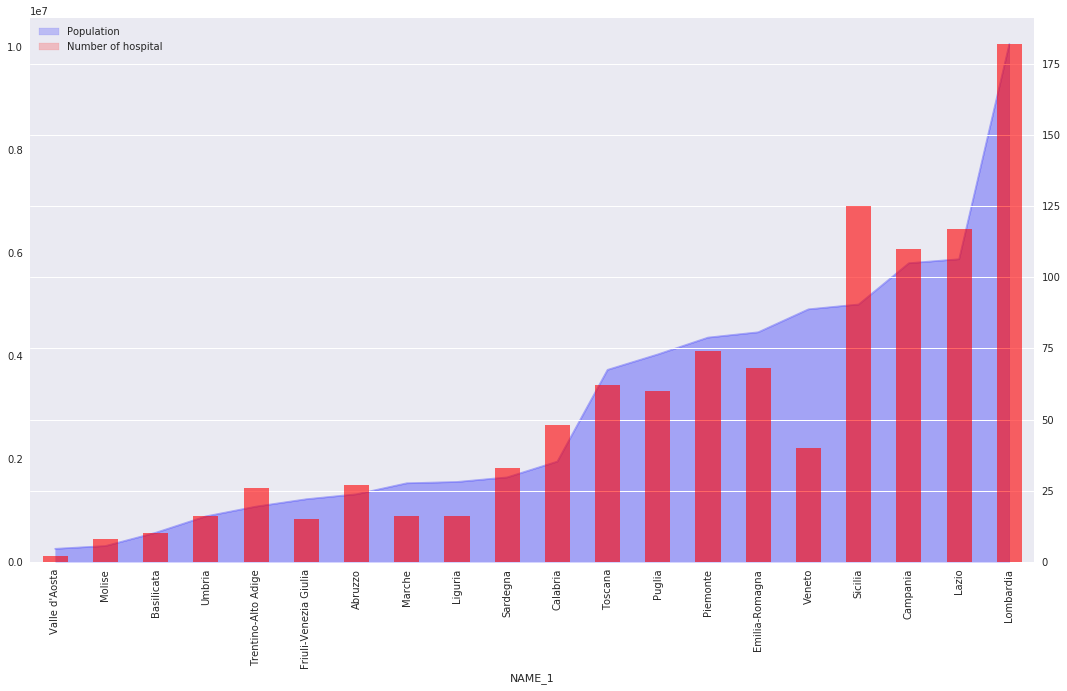

In [71]:

# Example Python program to draw an overlapped area plot

# for a pandas DataFrame

import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot

sns.set()

# pal = sns.color_palette("Set1")
# pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]

# Peak Temperature data for two cities

temp_df = map_df.join(df_hospital.loc[(df_hospital['Type of hospital']=='total')&(df_hospital['Data type']=='hospitals')].set_index('Territory'), on='NAME_1')
temp_df.rename(columns={'Value':'num_hospital'}, inplace=True)

temp_df = temp_df.join(asdtotal, on='NAME_1')

temp_df.set_index('NAME_1',inplace=True)
temp_df=temp_df.sort_values('Value',ascending=True)


tempData    = {"Total Positive":np.array(df_reg.groupby('Date')['Total_Actually_Positive'].sum()),

               "Total Deceased":np.array(df_reg.groupby('Date')['Deceased'].sum()),
               
               "Deceased":np.array(df_reg.groupby('Date')['New_Deceased'].sum()),
              
               "Healed":np.array(df_reg.groupby('Date')['New_Healed'].sum())};


# Seasons              

seasons     = range(1,61)

 

# Create a DataFrame instance

dataFrame   = pd.DataFrame(tempData, index=seasons)

m1_t = pd.DataFrame({
#  'abnormal' : [90,40,30,30],
#  'fix' : [60,70,65,70],
 'normal' : np.array(df_reg.groupby('Date')['New_Actually_Positive'].sum())
#   'bad_rate' : [20,30,40,24]
},index=seasons)

# #Draw an area plot for the DataFrame data
# dataFrame.plot(figsize=(18,10),kind='area', stacked=False,alpha=0.7)
# # df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
# m1_t['normal'].plot(secondary_y=True,kind='bar', stacked=False,alpha=0.7,color='black')

#Draw an area plot for the DataFrame data
# m1_t.plot(figsize=(18,10),kind='bar', stacked=False,alpha=0.2)
# df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
temp_df['Value'].plot(kind='area', stacked=False,alpha=0.3,color='blue',figsize=(18,10))
temp_df['num_hospital'].plot(secondary_y=True,kind='bar', stacked=False,alpha=0.6,color='red')

# dataFrame['Healed'].plot(kind='bar', stacked=False,alpha=0.4,color='Green')

# dataFrame['Total Positive'].plot(secondary_y=True,kind='area', stacked=False,alpha=0.2,color='black')
# dataFrame['Total Deceased'].plot(secondary_y=True,kind='area', stacked=False,alpha=0.2,color='red')


blue_patch = mpatches.Patch(color='blue',alpha=0.2, label='Population')
red_patch = mpatches.Patch(color='red',alpha=0.2, label='Number of hospital')

plot.legend(handles=[blue_patch,red_patch])


plot.show(block=True);

In [72]:
temphospital=df_hospital.loc[(df_hospital['Type of hospital']=='total')&(df_hospital['Data type']=='hospitals'),['Value','Territory']].set_index('Territory')

for i in df_reg['Region_Name'].unique():
    df_reg.loc[df_reg['Region_Name']==i,'Population']=asdtotal.loc[i,'Value']
    df_reg.loc[df_reg['Region_Name']==i,'Old_Population']=asd.loc[i,'Value']
    df_reg.loc[df_reg['Region_Name']==i,'hospital']=temphospital.loc[i,'Value']

In [73]:
from datetime import datetime, timedelta, date

# df_reg.loc[:, 'Date'] = pd.DatetimeIndex(df_reg.Date)
# df_reg.loc[:, 'month'] = df_reg.Date.apply(lambda x: x.month)
# df_reg.loc[:, 'day'] = df_reg.Date.apply(lambda x: x.day)
# df_reg.loc[:, 'dow'] = df_reg.Date.apply(lambda x: x.dayofweek)
# df_reg.loc[:, 'doy'] = df_reg.Date.apply(lambda x: x.dayofyear)

# df_reg['doy2'] = df_reg['doy']*df_reg['doy']


In [74]:
def GenerateTanggal(df):
    df.loc[:, 'Date'] = pd.DatetimeIndex(df.Date)
#     df.loc[:, 'month'] = df.Date.apply(lambda x: x.month)
#     df.loc[:, 'day'] = df.Date.apply(lambda x: x.day)
    df.loc[:, 'dow'] = df.Date.apply(lambda x: x.dayofweek)
    df.loc[:, 'doy'] = df.Date.apply(lambda x: x.dayofyear)

    df['doy2'] = df['doy']*df['doy']
    
#     df['hospital']=np.log(df['hospital'])
    
    return df

In [75]:
df_reg=GenerateTanggal(df_reg)

In [76]:
import seaborn as sns


# sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("iris")
# g = sns.pairplot(df_reg.loc[df_reg['Region_Name']=='Campania',col])

In [77]:
col=['Hospitalized_with_Symptoms',
     'Healed',
     'Deceased',
     'Total_Cases',
     'Total_Medical_Swabs',
     'Total_Hospitalized', 
     'Total_Actually_Positive',
     'Date',
     'Region_Code',
     'Tot_Home_Isolation',
     'Intensive_Care',
     'New_Actually_Positive',
     'New_Healed',
     'New_Deceased',
     'New_Medical_Swabs'
]
# df_model=pd.get_dummies(df_reg.loc[df_reg['Date']<'2020-04-04 18:00:00'].drop(col,axis=1), columns=['Region_Name'])
# df_modeltest=pd.get_dummies(df_reg.loc[df_reg['Date']>='2020-04-04 18:00:00'].drop(col,axis=1), columns=['Region_Name'])
df_model=pd.get_dummies(df_reg.drop(col,axis=1), columns=['Region_Name'])


In [78]:
df_model.columns

Index(['Region_Latitude', 'Region_Longitude', 'Population', 'Old_Population',
       'hospital', 'dow', 'doy', 'doy2', 'Region_Name_Abruzzo',
       'Region_Name_Basilicata', 'Region_Name_Calabria',
       'Region_Name_Campania', 'Region_Name_Emilia-Romagna',
       'Region_Name_Friuli-Venezia Giulia', 'Region_Name_Lazio',
       'Region_Name_Liguria', 'Region_Name_Lombardia', 'Region_Name_Marche',
       'Region_Name_Molise', 'Region_Name_Piemonte', 'Region_Name_Puglia',
       'Region_Name_Sardegna', 'Region_Name_Sicilia', 'Region_Name_Toscana',
       'Region_Name_Trentino-Alto Adige', 'Region_Name_Umbria',
       'Region_Name_Valle d'Aosta', 'Region_Name_Veneto'],
      dtype='object')

In [79]:
def rmse(ypred, ytrue):
    return np.sqrt(np.mean((ytrue-ypred)**2))

polynomial

In [80]:
from sklearn.metrics import SCORERS

SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [81]:
qa=df_reg.copy()
num = qa._get_numeric_data()
num[num < 0] = 0


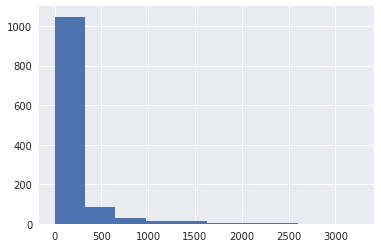

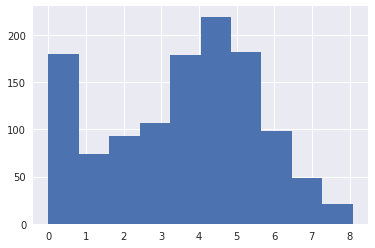

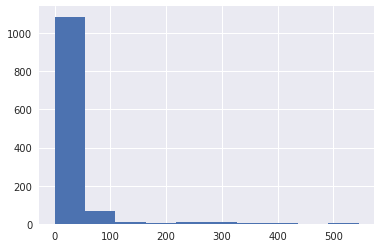

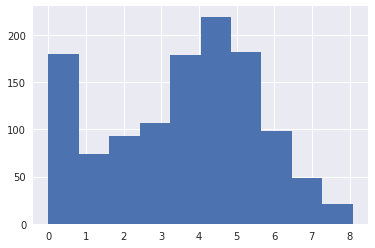

In [82]:
from scipy.stats import boxcox
from matplotlib import pyplot

sns.set
pyplot.hist(qa.New_Actually_Positive)
pyplot.show()

wad = np.log1p(qa.New_Actually_Positive)
pyplot.show()

pyplot.hist(wad)
pyplot.show()


pyplot.hist(qa.New_Deceased)

pyplot.show()

pyplot.hist(wad)


pyplot.show()





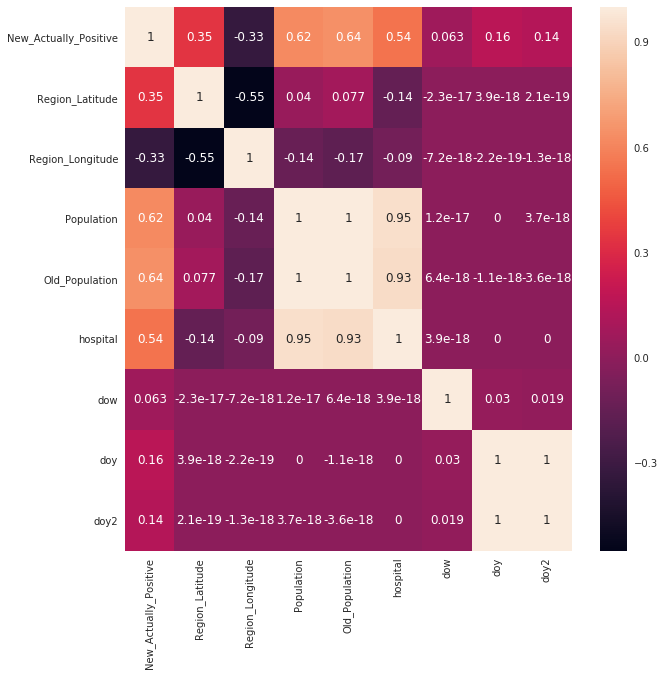

In [83]:
sns.set()
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(qa[['New_Actually_Positive','Region_Latitude', 'Region_Longitude', 'Population', 'Old_Population',
       'hospital', 'dow', 'doy', 'doy2']].corr(),ax=ax,annot=True)

In [84]:
corrr=[
      ]

# Modeling

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression


x=pd.get_dummies(qa.drop(col,axis=1), columns=['Region_Name'])



x=x.drop(corrr,axis=1)

y=np.log1p(qa['New_Actually_Positive'])

lr_model = LinearRegression()

lr_model.fit(x,y)
y_pred=lr_model.predict(x)
y_pred[y_pred < 0] = 0


print(r2_score(qa['New_Actually_Positive'], np.expm1(y_pred)))
print(mean_absolute_error(qa['New_Actually_Positive'],np.expm1(y_pred)))

kf = KFold(n_splits=5,shuffle=True,random_state=10)


scores = cross_val_score(lr_model, x, np.expm1(y_pred), cv=kf, scoring='neg_mean_absolute_error')
print(scores)
print(np.mean(scores))

y_lr=np.expm1(y_pred)
x_lr=x

0.6412345798362569
65.03943424464683
[-136.13182684  -98.44632407 -110.60742053 -103.59755388  -98.94807851]
-109.54624076808015


In [86]:
import statsmodels.api as sm

results=sm.OLS(y,x).fit()
results.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     New_Actually_Positive   R-squared:                       0.865
Model:                               OLS   Adj. R-squared:                  0.863
Method:                    Least Squares   F-statistic:                     343.4
Date:                   Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                           15:41:54   Log-Likelihood:                -1340.8
No. Observations:                   1200   AIC:                             2728.
Df Residuals:                       1177   BIC:                             2845.
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Region_Latitude                      -0.4555      0.012    -39.475      0.000      -0.478      -0.433
Region_Longitude                     -0.3670      0.010    -35.329      0.000      -0.387      -0.347
Population                         3.661e-07   1.84e-07      1.990      0.047    5.22e-09    7.27e-07
Old_Population                     2.166e-06   3.27e-07      6.619      0.000    1.52e-06    2.81e-06
hospital                             -0.0616      0.002    -33.035      0.000      -0.065      -0.058
dow                                   0.0542      0.011      4.968      0.000       0.033       0.076
doy                                   0.5903      0.014     42.986      0.000       0.563       0.617
doy2                                 -0.0032   8.09e-05    -39.359      0.000      -0.003      -0.003
Region_Name_Abruzzo                   0.6272      0.092      6.810      0.000       0.446       0.808
Region_Name_Basilicata               -0.8691      0.087     -9.968      0.000      -1.040      -0.698
Region_Name_Calabria                 -0.1369      0.084     -1.629      0.103      -0.302       0.028
Region_Name_Campania                 -0.2421      0.055     -4.434      0.000      -0.349      -0.135
Region_Name_Emilia-Romagna            1.0654      0.091     11.707      0.000       0.887       1.244
Region_Name_Friuli-Venezia Giulia     1.7767      0.097     18.239      0.000       1.586       1.968
Region_Name_Lazio                    -0.3272      0.088     -3.734      0.000      -0.499      -0.155
Region_Name_Liguria                  -0.3079      0.090     -3.432      0.001      -0.484      -0.132
Region_Name_Lombardia                 0.5814      0.070      8.266      0.000       0.443       0.719
Region_Name_Marche                    1.2548      0.092     13.693      0.000       1.075       1.435
Region_Name_Molise                   -0.8420      0.089     -9.435      0.000      -1.017      -0.667
Region_Name_Piemonte                 -0.2520      0.083     -3.038      0.002      -0.415      -0.089
Region_Name_Puglia                   -0.2124      0.083     -2.569      0.010      -0.375      -0.050
Region_Name_Sardegna                 -3.2840      0.109    -30.259      0.000      -3.497      -3.071
Region_Name_Sicilia                  -0.3525      0.077     -4.574      0.000      -0.504      -0.201
Region_Name_Toscana                   0.0137      0.088      0.154      0.877      -0.160       0.187
Region_Name_Trentino-Alto Adige       2.7711      0.094     29.572      0.000       2.587       2.955
Region_Name_Umbria                   -0.2001      0.092     -2.175      0.030      -0.381      -0.020
Region_Name_Valle d'Aosta            -0.9482      0.071    -13.403      0.000      -1.087   

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

rf_params = {'n_estimators': 100, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**rf_params)


x=pd.get_dummies(qa.drop(col,axis=1), columns=['Region_Name'])


x=x.drop(corrr,axis=1)


y=np.log1p(qa['New_Actually_Positive'])

rf_model.fit(x,y)
y_pred=rf_model.predict(x)
y_pred[y_pred < 0] = 0
from sklearn.metrics import r2_score

print(r2_score(qa['New_Actually_Positive'], np.expm1(y_pred)))
print(mean_absolute_error(qa['New_Actually_Positive'],np.expm1(y_pred)))

from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(rf_model, x, np.expm1(y_pred), cv=kf, scoring='neg_mean_absolute_error')
print(scores)
print(np.mean(scores))



0.9753105934074389
19.727373171299313
[-16.97666096 -16.87995176 -17.61933709 -12.32063967 -15.83262536]
-15.925842966688682


In [88]:
dftambahan=qa.copy()
dftambahan['Date']=dftambahan['Date']+timedelta(days=30)
dftambahan2=dftambahan.loc[dftambahan['Date']>'2020-04-23 17:00:00']
dftambahan2.loc[:,'New_Actually_Positive']=0

dftambahan2=GenerateTanggal(dftambahan2)

dfterakhir=pd.concat([qa, dftambahan2])



x=pd.get_dummies(dfterakhir.drop(col,axis=1), columns=['Region_Name'])
x=x.drop(corrr,axis=1)

y_pred_lr=lr_model.predict(x)
y_pred_lr[y_pred_lr < 0] = 0

y_pred_rf=rf_model.predict(x)
y_pred_rf[y_pred_rf < 0] = 0



dfhasil=dfterakhir.copy()
dfhasil['prediksi lr']=np.expm1(y_pred_lr)
dfhasil['prediksi rf']=np.expm1(y_pred_rf)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [89]:
from datetime import datetime, timedelta, date

# dftambahan2.loc[:, 'Date'] = pd.DatetimeIndex(dftambahan2.Date)
# dftambahan2.loc[:, 'month'] = dftambahan2.Date.apply(lambda x: x.month)
# dftambahan2.loc[:, 'day'] = dftambahan2.Date.apply(lambda x: x.day)
# dftambahan2.loc[:, 'dow'] = dftambahan2.Date.apply(lambda x: x.dayofweek)
# dftambahan2.loc[:, 'doy'] = dftambahan2.Date.apply(lambda x: x.dayofyear)
# dftambahan2['doy2'] = dftambahan2['doy']*dftambahan2['doy']

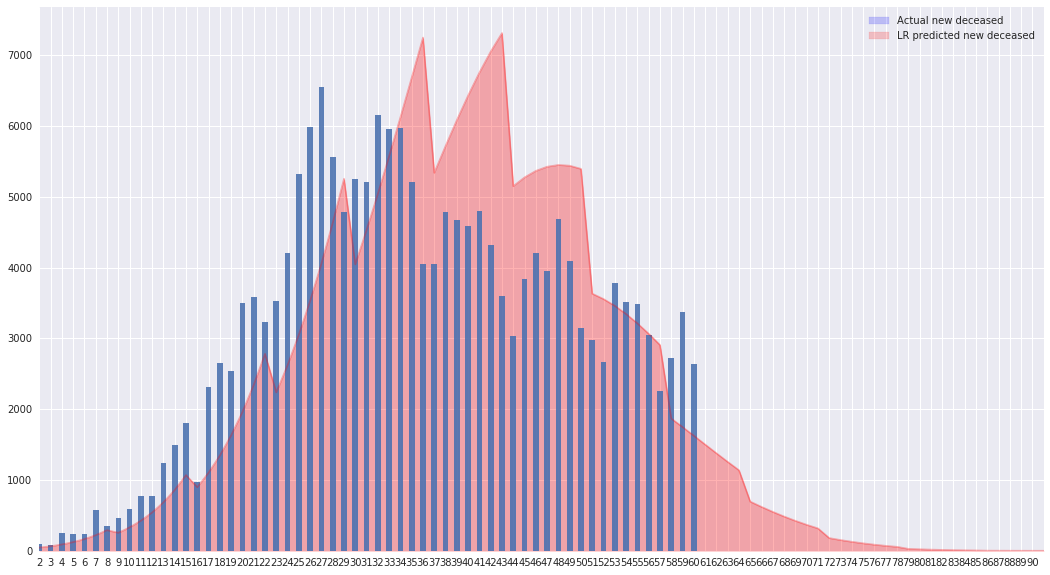

In [90]:
# Example Python program to draw an overlapped area plot

# for a pandas DataFrame

import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot

sns.set()


tempData    = {
               
               "Deceased":np.array(dfhasil.groupby('Date')['prediksi lr'].sum())}


# Seasons              

seasons     = range(1,len(np.array(dfhasil.groupby('Date')['prediksi lr'].sum()))+1)

 

# Create a DataFrame instance

dataFrame   = pd.DataFrame(tempData, index=seasons)

m1_t = pd.DataFrame({
 'normal' : np.array(dfterakhir.groupby('Date')['New_Actually_Positive'].sum())
},index=seasons)


#Draw an area plot for the DataFrame data
m1_t.plot(figsize=(18,10),kind='bar', stacked=False,alpha=0.9)
# df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
dataFrame['Deceased'].plot(kind='area', stacked=False,alpha=0.3,color='red')


blue_patch = mpatches.Patch(color='blue',alpha=0.2, label='Actual new deceased')
red_patch = mpatches.Patch(color='red',alpha=0.2, label='LR predicted new deceased')

plot.legend(handles=[blue_patch,red_patch])



plot.show(block=True);

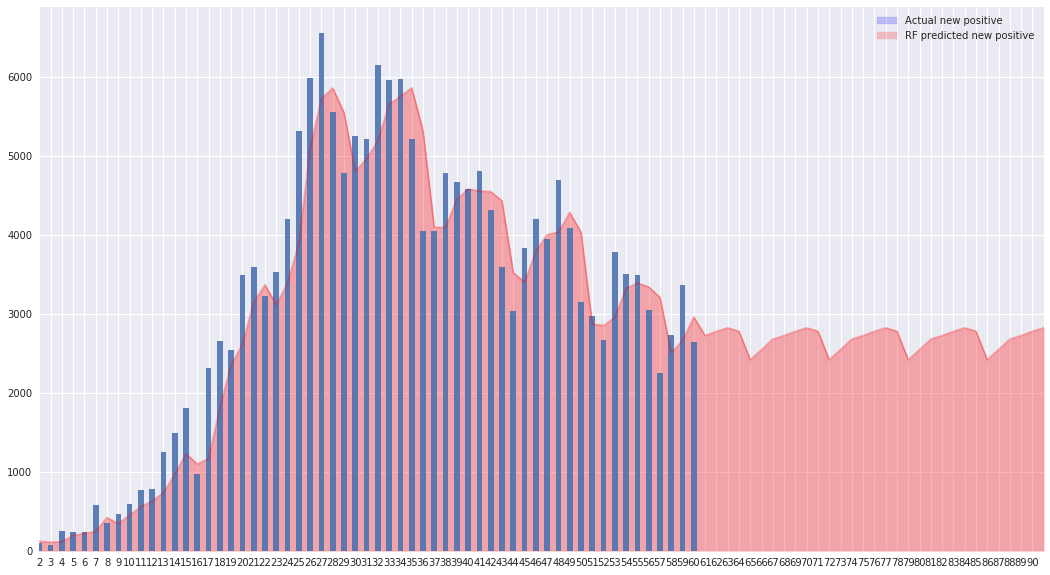

In [91]:
# Example Python program to draw an overlapped area plot

# for a pandas DataFrame

import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot

sns.set()


tempData    = {
               
               "Deceased":np.array(dfhasil.groupby('Date')['prediksi rf'].sum())}
   

seasons     = range(1,len(np.array(dfhasil.groupby('Date')['prediksi lr'].sum()))+1)

 

# Create a DataFrame instance

dataFrame   = pd.DataFrame(tempData, index=seasons)

m1_t = pd.DataFrame({
#  'abnormal' : [90,40,30,30],
#  'fix' : [60,70,65,70],
 'normal' : np.array(dfterakhir.groupby('Date')['New_Actually_Positive'].sum())
#   'bad_rate' : [20,30,40,24]
},index=seasons)


#Draw an area plot for the DataFrame data
m1_t.plot(figsize=(18,10),kind='bar', stacked=False,alpha=0.9)
# df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
dataFrame['Deceased'].plot(kind='area', stacked=False,alpha=0.3,color='red')


blue_patch = mpatches.Patch(color='blue',alpha=0.2, label='Actual new positive')
red_patch = mpatches.Patch(color='red',alpha=0.2, label='RF predicted new positive')

plot.legend(handles=[blue_patch,red_patch])



plot.show(block=True);

In [92]:
# check standartize coeficient

# import statsmodels.api as sm
# model = sm.OLS(y_pred,X_poly)
# results = model.fit()
# results.summary()

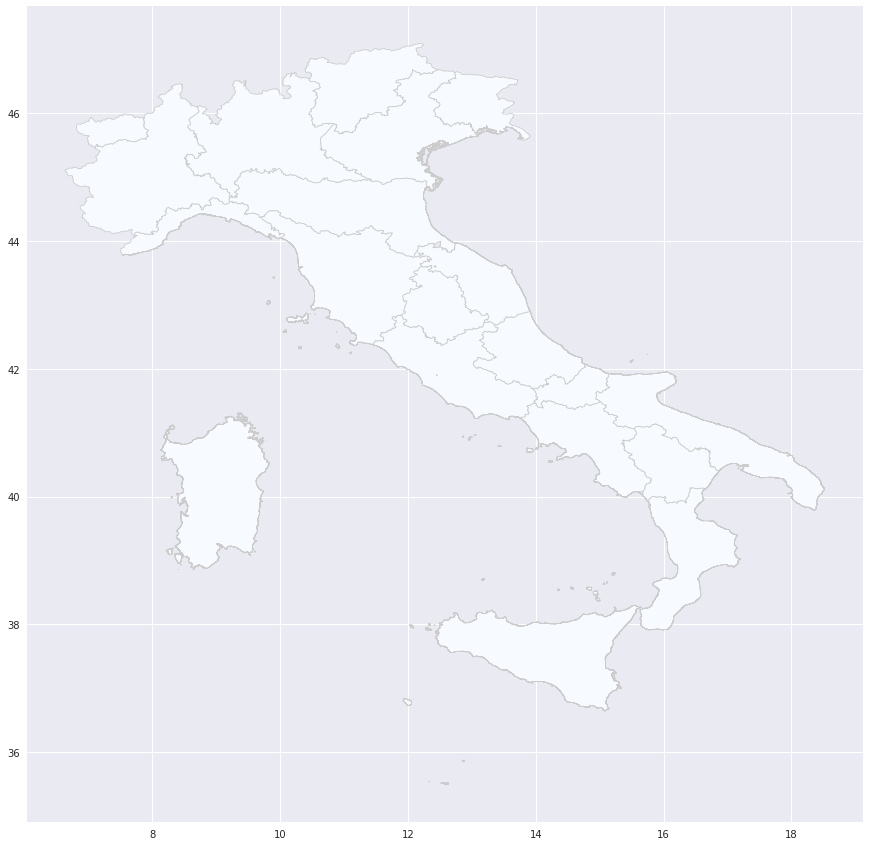

In [93]:
import matplotlib.pyplot as plt

data_for_map=dfhasil.loc[dfhasil['Date']=='2020-05-23 17:00:00'].copy()

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map.set_index('Region_Name'), on='NAME_1')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'prediksi lr'
# set the range for the choropleth
vmin, vmax = 0, 17000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

merged=merged.append({'prediksi lr' : 17000 } , ignore_index=True)



#get province with highest total cases
# plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')


# Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

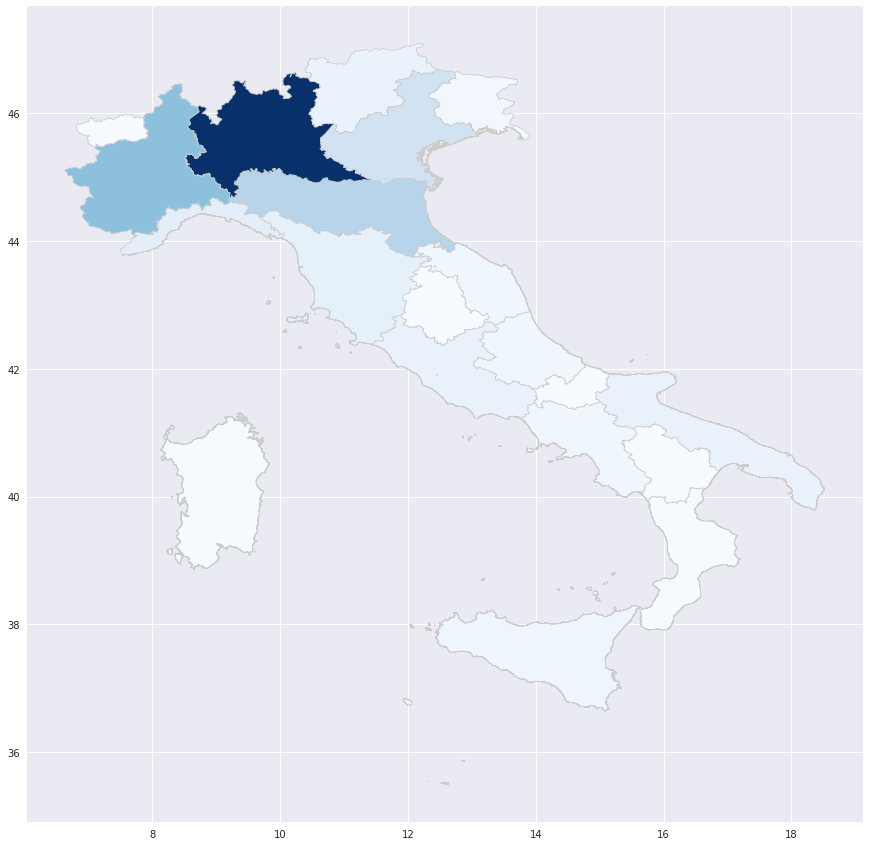

In [94]:
import matplotlib.pyplot as plt

data_for_map=dfhasil.loc[dfhasil['Date']=='2020-05-23 17:00:00'].copy()

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map.set_index('Region_Name'), on='NAME_1')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'prediksi rf'
# set the range for the choropleth
vmin, vmax = 0, 1073
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

merged=merged.append({'prediksi rf' : 1073 } , ignore_index=True)



#get province with highest total cases
# plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')


# Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

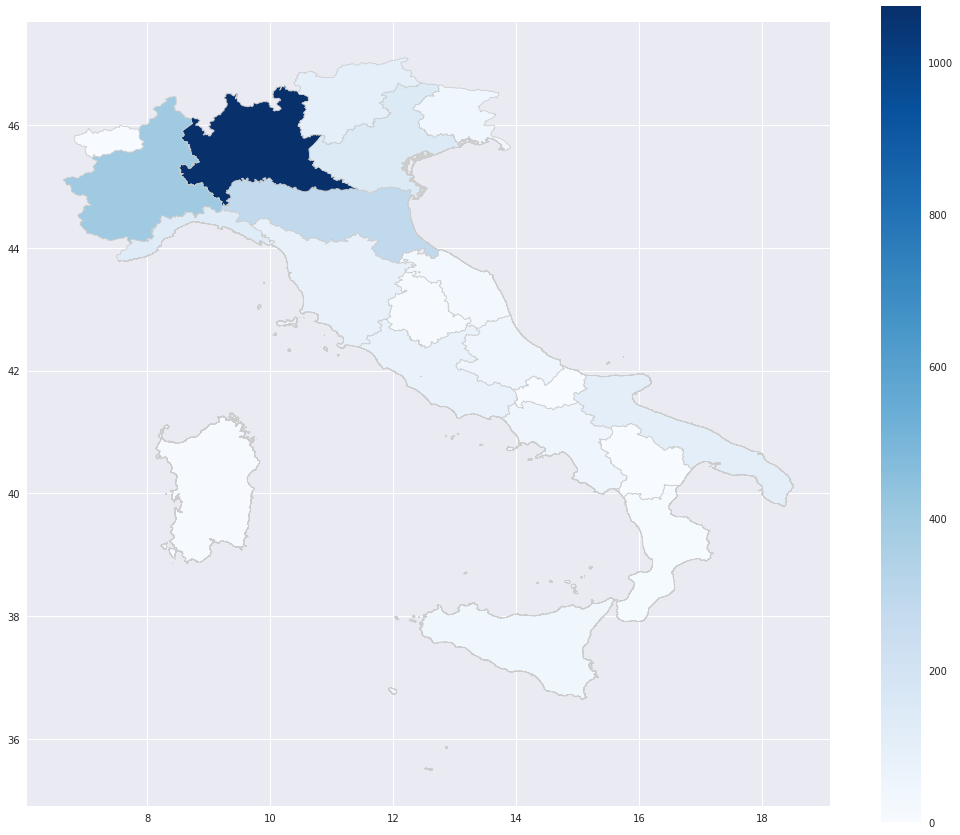

In [95]:
import matplotlib.pyplot as plt

data_for_map=df_reg.loc[df_reg['Date']=='2020-04-23 17:00:00'].copy()

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map.set_index('Region_Name'), on='NAME_1')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'New_Actually_Positive'
# set the range for the choropleth
vmin, vmax = 0, 1073
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

# merged=merged.append({'prediksi rf' : 17000 } , ignore_index=True)



#get province with highest total cases
# plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [96]:
merged.New_Actually_Positive.max()

1073

In [97]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [98]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


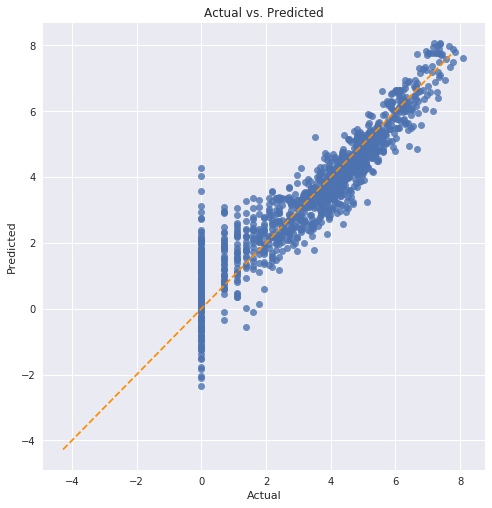

In [99]:
linear_assumption(lr_model, x_lr, y)

In [100]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


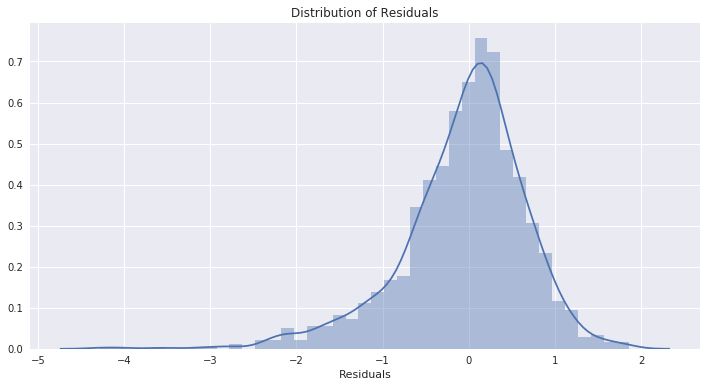


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [101]:
normal_errors_assumption(lr_model, x_lr, y)

In [102]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (18,15))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

In [103]:
# multicollinearity_assumption(lr_model, x_lr, y)


In [104]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [105]:
autocorrelation_assumption(lr_model, x_lr, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.6239580242306488
Little to no autocorrelation 

Assumption satisfied


In [106]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


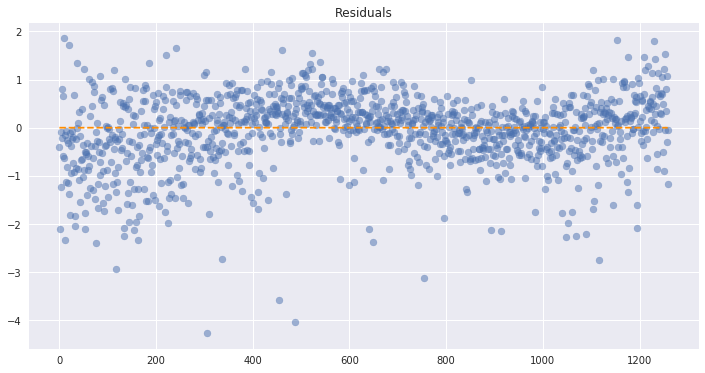

In [107]:
homoscedasticity_assumption(lr_model, x_lr, y)

In [108]:
x.columns

Index(['Region_Latitude', 'Region_Longitude', 'Population', 'Old_Population',
       'hospital', 'dow', 'doy', 'doy2', 'Region_Name_Abruzzo',
       'Region_Name_Basilicata', 'Region_Name_Calabria',
       'Region_Name_Campania', 'Region_Name_Emilia-Romagna',
       'Region_Name_Friuli-Venezia Giulia', 'Region_Name_Lazio',
       'Region_Name_Liguria', 'Region_Name_Lombardia', 'Region_Name_Marche',
       'Region_Name_Molise', 'Region_Name_Piemonte', 'Region_Name_Puglia',
       'Region_Name_Sardegna', 'Region_Name_Sicilia', 'Region_Name_Toscana',
       'Region_Name_Trentino-Alto Adige', 'Region_Name_Umbria',
       'Region_Name_Valle d'Aosta', 'Region_Name_Veneto'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea61bdc2e8>,
      dtype=object)

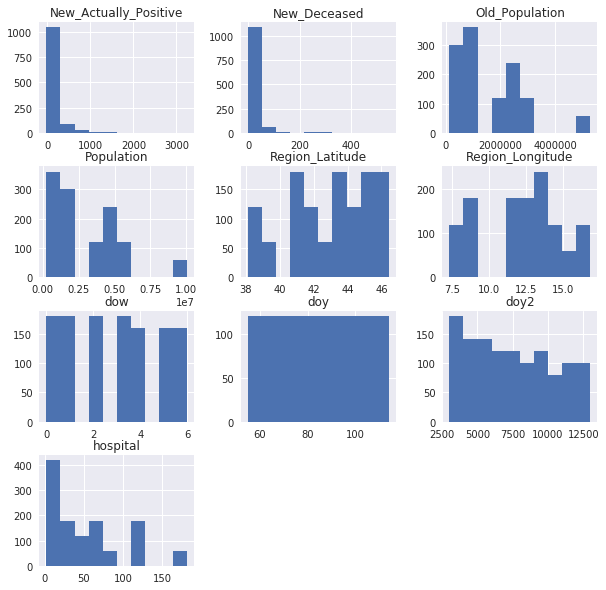

In [109]:
sns.set

df_reg[['New_Deceased','New_Actually_Positive','Region_Latitude', 'Region_Longitude', 'Population', 'Old_Population',
       'hospital', 
        'dow', 'doy', 'doy2']].hist(figsize=(10,10))

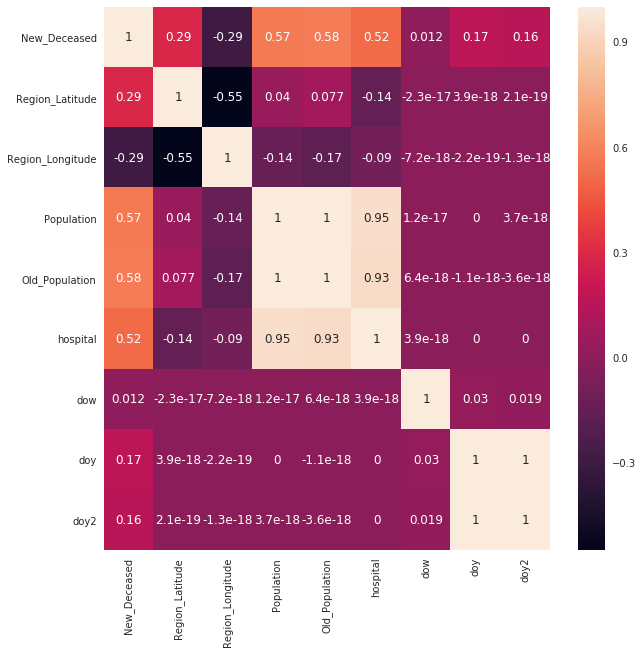

In [110]:
sns.set()
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(df_reg[['New_Deceased','Region_Latitude', 'Region_Longitude', 'Population', 'Old_Population',
       'hospital', 'dow', 'doy', 'doy2']].corr(),ax=ax,annot=True)

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



x=pd.get_dummies(qa.drop(col,axis=1), columns=['Region_Name'])



x=x.drop(corrr,axis=1)

y=np.log1p(qa['New_Deceased'])

lr_model = LinearRegression()

lr_model.fit(x,y)
y_pred=lr_model.predict(x)
y_pred[y_pred < 0] = 0


print(r2_score(qa['New_Deceased'], np.expm1(y_pred)))
print(mean_absolute_error(qa['New_Deceased'],np.expm1(y_pred)))

kf = KFold(n_splits=5,shuffle=True,random_state=10)


scores = cross_val_score(lr_model, x, np.expm1(y_pred), cv=kf, scoring='neg_mean_absolute_error')
print(scores)
print(np.mean(scores))

y_lr=np.expm1(y_pred)
x_lr=x

0.7493914506767543
8.573158845727702
[-10.90248142  -7.89153364  -8.39489017  -9.11040826  -7.60387885]
-8.780638468983861


In [112]:
import statsmodels.api as sm

results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           New_Deceased   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     245.4
Date:                Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                        15:42:07   Log-Likelihood:                -1212.1
No. Observations:                1200   AIC:                             2470.
Df Residuals:                    1177   BIC:                             2587.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Region_Latitude                      -0.2503      0.010    -24.143      0.000      -0.271      -0.230
Region_Longitude                     -0.2479      0.009    -26.560      0.000      -0.266      -0.230
Population                        -3.647e-07   1.65e-07     -2.207      0.028   -6.89e-07   -4.05e-08
Old_Population                      2.53e-06   2.94e-07      8.606      0.000    1.95e-06    3.11e-06
hospital                             -0.0365      0.002    -21.771      0.000      -0.040      -0.033
dow                                  -0.0161      0.010     -1.640      0.101      -0.035       0.003
doy                                   0.3097      0.012     25.108      0.000       0.286       0.334
doy2                                 -0.0016   7.27e-05    -21.581      0.000      -0.002      -0.001
Region_Name_Abruzzo                   0.4640      0.083      5.608      0.000       0.302       0.626
Region_Name_Basilicata               -0.3035      0.078     -3.874      0.000      -0.457      -0.150
Region_Name_Calabria                 -0.0378      0.075     -0.500      0.617      -0.186       0.110
Region_Name_Campania                 -0.1844      0.049     -3.759      0.000      -0.281      -0.088
Region_Name_Emilia-Romagna            1.0089      0.082     12.340      0.000       0.848       1.169
Region_Name_Friuli-Venezia Giulia     0.9671      0.088     11.051      0.000       0.795       1.139
Region_Name_Lazio                    -0.6487      0.079     -8.240      0.000      -0.803      -0.494
Region_Name_Liguria                   0.0045      0.081      0.056      0.956      -0.154       0.163
Region_Name_Lombardia                 0.8739      0.063     13.831      0.000       0.750       0.998
Region_Name_Marche                    1.0731      0.082     13.035      0.000       0.912       1.235
Region_Name_Molise                   -0.2299      0.080     -2.868      0.004      -0.387      -0.073
Region_Name_Piemonte                 -0.2134      0.075     -2.865      0.004      -0.360      -0.067
Region_Name_Puglia                   -0.0587      0.074     -0.791      0.429      -0.204       0.087
Region_Name_Sardegna                 -2.1961      0.098    -22.524      0.000      -2.387      -2.005
Region_Name_Sicilia                  -0.4236      0.069     -6.119      0.000      -0.559      -0.288
Region_Name_Toscana                  -0.3967      0.079     -4.994      0.000      -0.553      -0.241
Region_Name_Trentino-Alto Adige       1.7250      0.084     20.491      0.000       1.560       1.890
Region_Name_Umbria                   -0.4348      0.083     -5.263      0.000      -0.597      -0.273
Region_Name_Valle d'Aosta            -0.5643      0.064     -8.879      0.000      -0.689      -0.440
Region_Name_Veneto     

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

rf_params = {'n_estimators': 100, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**rf_params)


x=pd.get_dummies(qa.drop(col,axis=1), columns=['Region_Name'])


x=x.drop(corrr,axis=1)


y=np.log1p(qa['New_Deceased'])

rf_model.fit(x,y)
y_pred=rf_model.predict(x)
y_pred[y_pred < 0] = 0
from sklearn.metrics import r2_score

print(r2_score(qa['New_Deceased'], np.expm1(y_pred)))
print(mean_absolute_error(qa['New_Deceased'],np.expm1(y_pred)))

from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(rf_model, x, np.expm1(y_pred), cv=kf, scoring='neg_mean_absolute_error')
print(scores)
print(np.mean(scores))



0.9785496146058497
2.89338161398769
[-2.79562661 -2.75822817 -2.12847711 -2.01530098 -1.86215493]
-2.3119575596444366


In [114]:
dftambahan=qa.copy()
dftambahan['Date']=dftambahan['Date']+timedelta(days=30)
dftambahan2=dftambahan.loc[dftambahan['Date']>'2020-04-23 17:00:00']
dftambahan2.loc[:,'New_Deceased']=0

dftambahan2=GenerateTanggal(dftambahan2)

dfterakhir=pd.concat([qa, dftambahan2])



x=pd.get_dummies(dfterakhir.drop(col,axis=1), columns=['Region_Name'])
x=x.drop(corrr,axis=1)

y_pred_lr=lr_model.predict(x)
y_pred_lr[y_pred_lr < 0] = 0

y_pred_rf=rf_model.predict(x)
y_pred_rf[y_pred_rf < 0] = 0



dfhasil=dfterakhir.copy()
dfhasil['prediksi lr']=np.expm1(y_pred_lr)
dfhasil['prediksi rf']=np.expm1(y_pred_rf)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


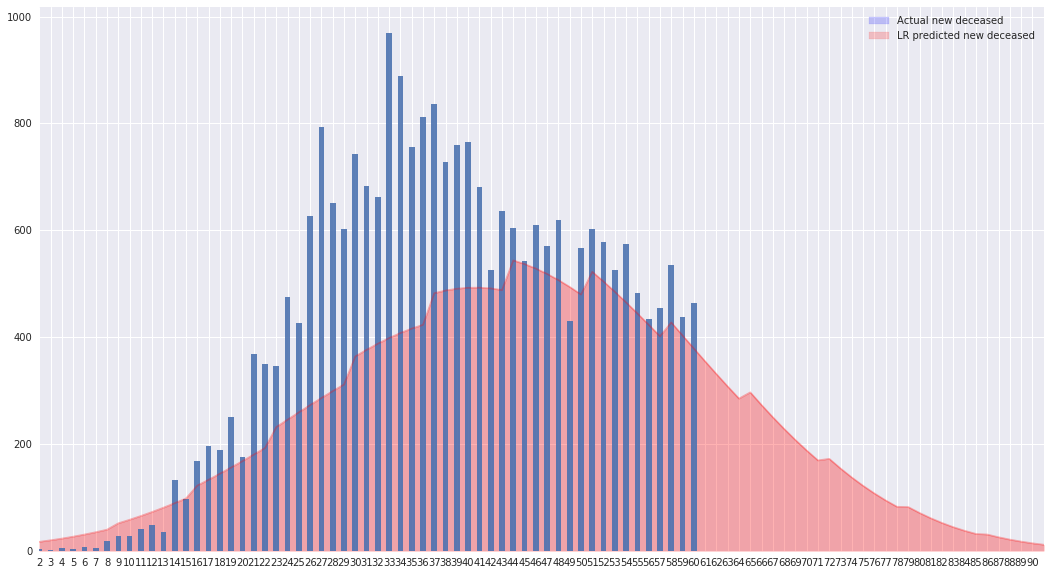

In [115]:
# Example Python program to draw an overlapped area plot

# for a pandas DataFrame

import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot

sns.set()


tempData    = {
               
               "Deceased":np.array(dfhasil.groupby('Date')['prediksi lr'].sum())}


# Seasons              

seasons     = range(1,len(np.array(dfhasil.groupby('Date')['prediksi lr'].sum()))+1)

 

# Create a DataFrame instance

dataFrame   = pd.DataFrame(tempData, index=seasons)

m1_t = pd.DataFrame({
 'normal' : np.array(dfterakhir.groupby('Date')['New_Deceased'].sum())
},index=seasons)


#Draw an area plot for the DataFrame data
m1_t.plot(figsize=(18,10),kind='bar', stacked=False,alpha=0.9)
# df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
dataFrame['Deceased'].plot(kind='area', stacked=False,alpha=0.3,color='red')


blue_patch = mpatches.Patch(color='blue',alpha=0.2, label='Actual new deceased')
red_patch = mpatches.Patch(color='red',alpha=0.2, label='LR predicted new deceased')

plot.legend(handles=[blue_patch,red_patch])



plot.show(block=True);

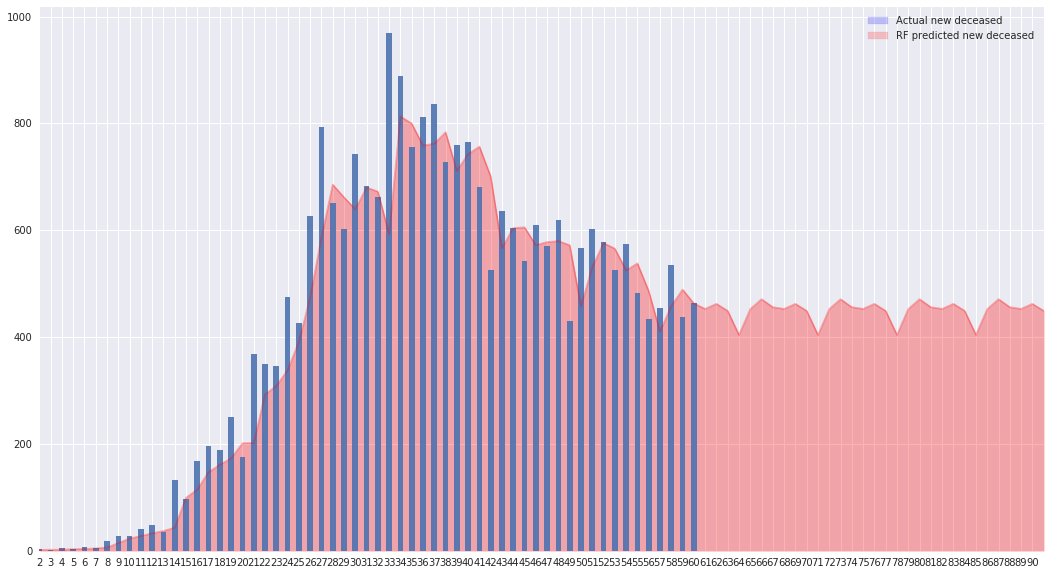

In [116]:
# Example Python program to draw an overlapped area plot

# for a pandas DataFrame

import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot

sns.set()


tempData    = {
               
               "Deceased":np.array(dfhasil.groupby('Date')['prediksi rf'].sum())}
   

seasons     = range(1,len(np.array(dfhasil.groupby('Date')['prediksi lr'].sum()))+1)

 

# Create a DataFrame instance

dataFrame   = pd.DataFrame(tempData, index=seasons)

m1_t = pd.DataFrame({
#  'abnormal' : [90,40,30,30],
#  'fix' : [60,70,65,70],
 'normal' : np.array(dfterakhir.groupby('Date')['New_Deceased'].sum())
#   'bad_rate' : [20,30,40,24]
},index=seasons)


#Draw an area plot for the DataFrame data
m1_t.plot(figsize=(18,10),kind='bar', stacked=False,alpha=0.9)
# df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
dataFrame['Deceased'].plot(kind='area', stacked=False,alpha=0.3,color='red')

blue_patch = mpatches.Patch(color='blue',alpha=0.2, label='Actual new deceased')
red_patch = mpatches.Patch(color='red',alpha=0.2, label='RF predicted new deceased')

plot.legend(handles=[blue_patch,red_patch])


plot.show(block=True);

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



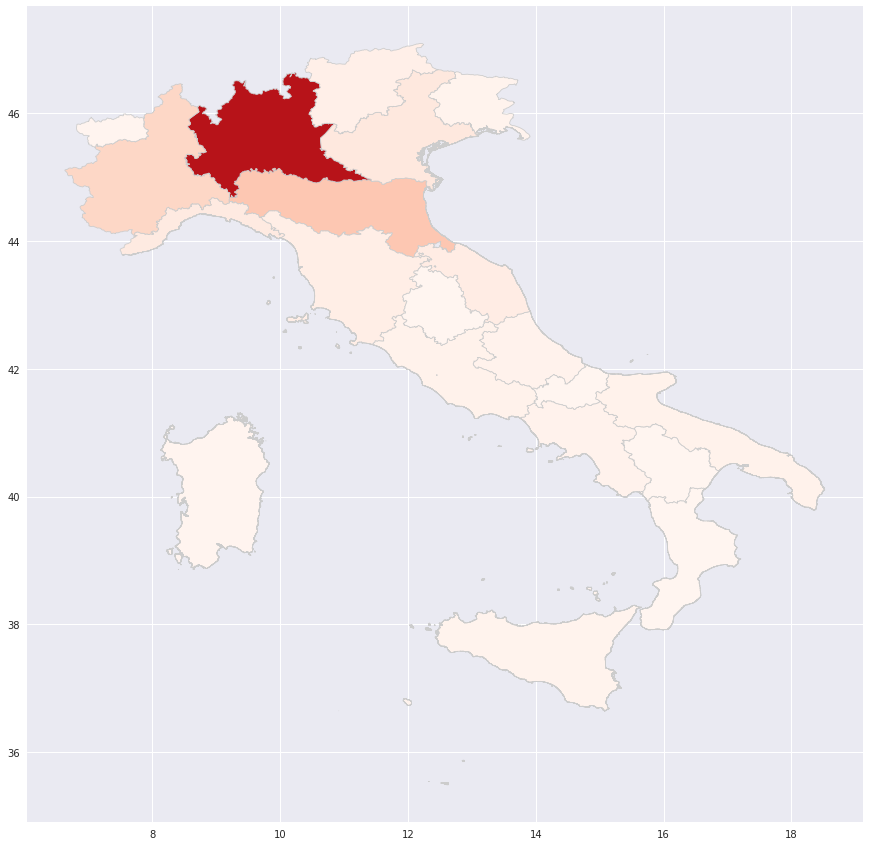

In [117]:
import matplotlib.pyplot as plt

zxc=dfhasil.loc[dfhasil['Date']>'2020-04-23 17:00:00']
data_for_map=qa.copy()
data_for_map.rename(columns={'New_Deceased':'prediksi lr'}, inplace=True)

dfterakhir=pd.concat([zxc, data_for_map])

data_for_map=dfterakhir[['prediksi lr','Region_Name']].groupby('Region_Name').sum()

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map, on='NAME_1')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'prediksi lr'
# set the range for the choropleth
vmin, vmax = 0, 18337
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

merged=merged.append({'prediksi lr' : 18337 } , ignore_index=True)



#get province with highest total cases
# plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')


# Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

In [118]:
merged['prediksi lr'].max()

18337.0

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



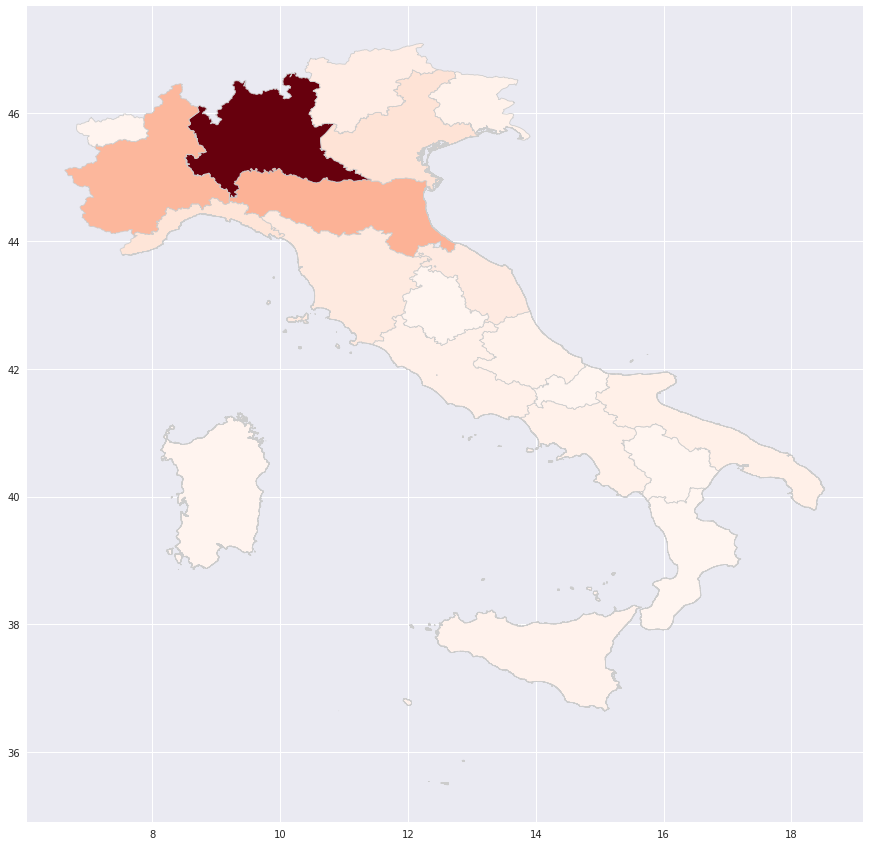

In [119]:
import matplotlib.pyplot as plt

zxc=dfhasil.loc[dfhasil['Date']>'2020-04-23 17:00:00']
data_for_map=qa.copy()
data_for_map.rename(columns={'New_Deceased':'prediksi rf'}, inplace=True)

dfterakhir=pd.concat([zxc, data_for_map])

data_for_map=dfterakhir[['prediksi rf','Region_Name']].groupby('Region_Name').sum()

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map, on='NAME_1')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'prediksi rf'
# set the range for the choropleth
vmin, vmax = 0, 18337
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

# merged=merged.append({'New_Deceased lr' : 17000 } , ignore_index=True)



#get province with highest total cases
# plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')


# Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

In [120]:
merged['prediksi rf'].max()

18337.00086278935

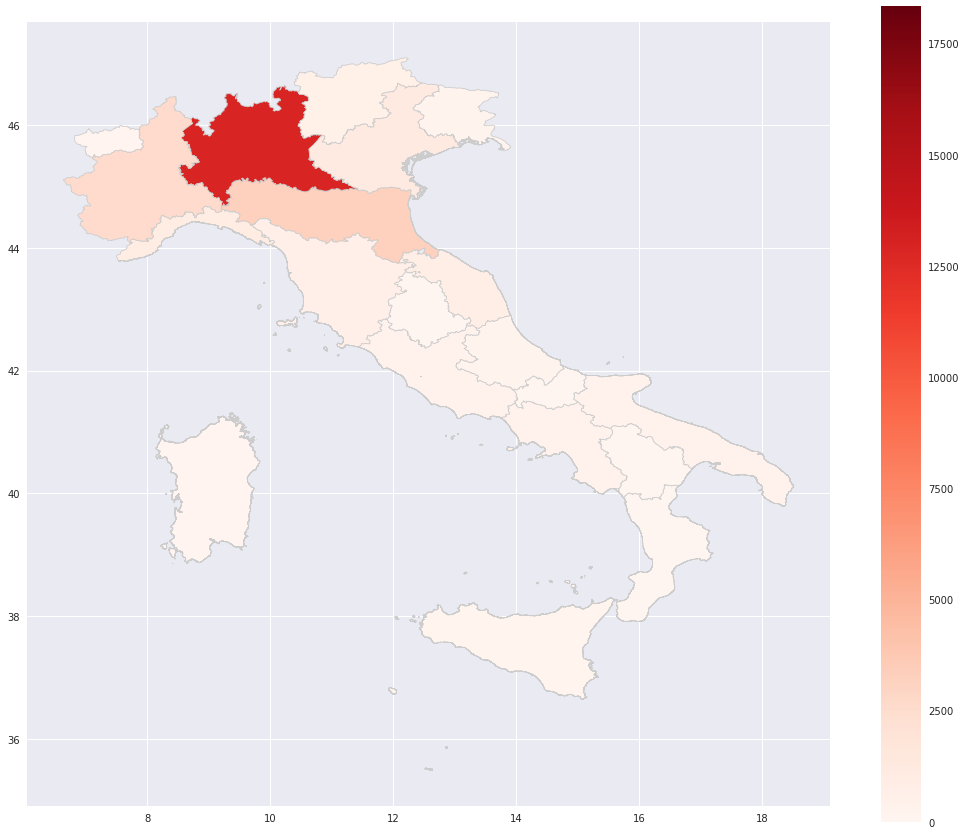

In [121]:
import matplotlib.pyplot as plt

data_for_map=df_reg.loc[df_reg['Date']=='2020-04-23 17:00:00'].copy()

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map.set_index('Region_Name'), on='NAME_1')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'Deceased'
# set the range for the choropleth
vmin, vmax = 0, 18337
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

merged=merged.append({'Deceased' : 18337 } , ignore_index=True)



#get province with highest total cases
# plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

In [122]:
merged['Deceased'].max()

18337.0

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


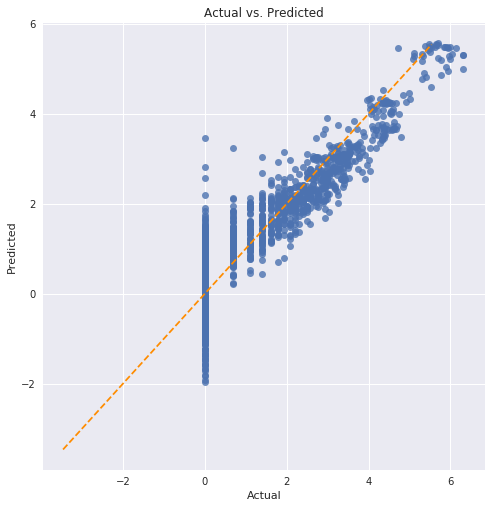

In [123]:
linear_assumption(lr_model, x_lr, y)

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 4.011506136139375e-07
Residuals are not normally distributed


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


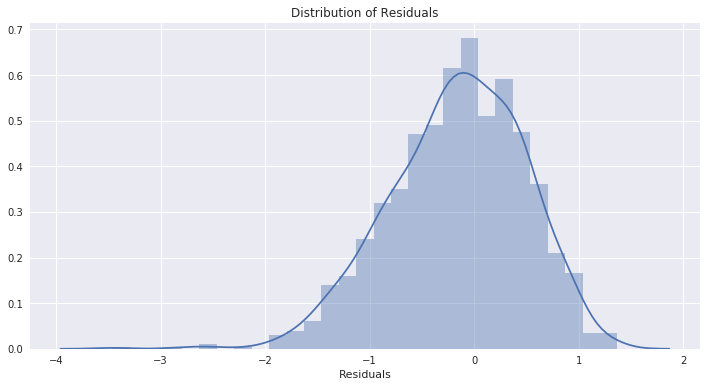


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [124]:
normal_errors_assumption(lr_model, x_lr, y)

In [125]:
autocorrelation_assumption(lr_model, x_lr, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.3483272855546424
Signs of positive autocorrelation 

Assumption not satisfied


Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


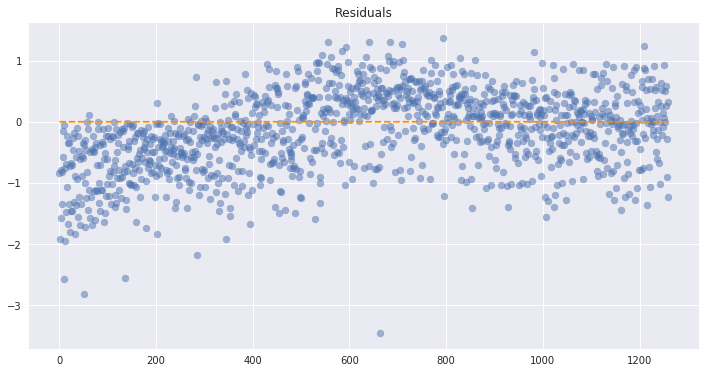

In [126]:
homoscedasticity_assumption(lr_model, x_lr, y)